# Projet 2 : Analysez des données de systèmes éducatifs

Vous êtes Data Scientist dans une start-up de la EdTech, nommée academy, qui propose des contenus de formation en ligne pour un public de niveau lycée et université.

Votre entreprise EdTech
Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.

Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :

- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?

## Votre mission
Mark vous a donc demandé de réaliser une analyse pré-exploratoire de ce jeu de données. Il vous a transmis cet email à la suite de la réunion :

Hello, Les données de la Banque mondiale sont disponibles à l’adresse suivante : https://datacatalog.worldbank.org/dataset/education-statistics
Ou en téléchargement direct à ce lien. Je te laisse regarder la page d’accueil qui décrit le jeu de données. En résumé, l’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation... 
Tu trouveras plus d’info sur ce site : http://datatopics.worldbank.org/education/

Pour la pré-analyse, pourrais-tu :

1. Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
2. Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
3. Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
4. Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

Ton travail va nous permettre de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays. On va partager ton analyse avec le board, alors merci de soigner la présentation et de l'illustrer avec des graphiques pertinents et lisibles !

Pour préparer ce projet, la première étape est de préparer l'environnement de travail. Pour cela, on commence par importer toutes les librairies nécéssaires pour pouvoir avancer confortablement dans le projet. 

### Importation de toutes les librairies nécessaires

In [349]:
import pandas as pd
import numpy as np
import collections
import inspect
import missingno as msno
# pour la visualisation des graphes 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# pour se débarrasser de tous les warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Importation de toutes les bases de données nécessaires

In [350]:
country = pd.read_csv('data/EdStatsCountry.csv')
countryseries = pd.read_csv('data/EdStatsCountry-Series.csv')
data = pd.read_csv('data/EdStatsData.csv', )
footnote = pd.read_csv('data/EdStatsFootNote.csv')
series = pd.read_csv('data/EdStatsSeries.csv')

In [351]:
# En cas d'erreur lors des modifications, un deuxième set du jeu de données est crée (version originale à conserver)
ocountry = country.copy()
ocountryseries = countryseries.copy()
odata = data.copy()
ofootnote = footnote.copy()
oseries = series.copy()

### Fonctions utiles pour la pré-analyse

In [353]:
# Création d'une fonction qui donne le pourcentage de données manquantes par colonne
def missing(df):
    x = df.columns.tolist() 
    y = round(df.isna().mean()*100, 2).tolist()
    df = pd.DataFrame({'Nom de la colonne' : x, 'Pourcentage de valeurs manquantes' : y})
    return df

In [354]:
# Création d'une fonction permettant de bien jongler la taille d'un ou des plots. 
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [369]:
# Renommage du nom des colonnes pour retirer tous les espaces et mettre tout en minuscule
def renaming_col(df):
    df.columns = df.columns.astype(str).str.lower()
    df.columns = df.columns.str.replace(' ','')
    #return df

## Pré-Analyse

### Description et vérification de la validité de la qualité du jeu de données de façon superficielle

#### Pourcentage total de données manquantes, nombre de colonnes et de lignes du jeu de données dans sa totalité

In [356]:
# Description générale du jeu de données contenant cinq tables - Data, Country, CountrySeries, Footnote et Series
lst = [
    ['Data', round(data.isna().mean().mean()*100,2), data.duplicated(keep=False).sum(), data.shape[1], data.shape[0]], 
    ['Country', round(country.isna().mean().mean()*100,2), country.duplicated(keep=False).sum(), country.shape[1], country.shape[0]],
    ['CountrySeries', round(countryseries.isna().mean().mean()*100,2), countryseries.duplicated(keep=False).sum(), countryseries.shape[1], countryseries.shape[0]], 
    ['Series', round(series.isna().mean().mean()*100,2), series.duplicated(keep=False).sum(), series.shape[1], series.shape[0]], 
    ['Footnote', round(footnote.isna().mean().mean()*100,2), footnote.duplicated(keep=False).sum(), footnote.shape[1], footnote.shape[0]]
] 

df_missing = pd.DataFrame(lst, columns =['Nom de la table', 'Pourcentage total de données manquantes', 'Données dupliquées superficiellement', 'Nombre de colonnes', 'Nombre de lignes'], dtype = float)
df_missing

,Nom de la table,Pourcentage total de données manquantes,Données dupliquées superficiellement,Nombre de colonnes,Nombre de lignes
0,Data,86.10,0.0,70.0,886930.0
1,Country,30.52,0.0,32.0,241.0
2,CountrySeries,25.00,0.0,4.0,613.0
3,Series,71.72,0.0,21.0,3665.0
4,Footnote,20.00,0.0,5.0,643638.0


Conclusion de cette première analyse superficielle:
Il y a dans la base de données `country` 32 colonnes et 241 lignes.
Il y a dans la base de données `series` 21 colonnes et 3665 lignes.
Il y a dans la base de données `countryseries` 4 colonnes et 613 lignes.
Il y a dans la base de données `footnote` 5 colonnes et 643638 lignes.
Il y a dans la base de données `data` 70 colonnes et 886930 lignes.

Il manque énormément de données dans notre jeu de données et quelque soit les tables. Ainsi, dans la table data, il manque 86.1% des données. Beaucoup de tri devra être fait avant de pouvoir utiliser ces différents tables. 

Il n'y a pas de données répliquées dans la table `data`.

A REFAIRE 

### Description un peu plus détaillée de chaque table

In [357]:
# Pourcentage de valeurs manquantes dans la table `data`
miss_d = missing(data)
miss_d

,Nom de la colonne,Pourcentage de valeurs manquantes
0,Country Name,0.00
1,Country Code,0.00
2,Indicator Name,0.00
3,Indicator Code,0.00
4,1970,91.85
...,...,...
65,2085,94.20
66,2090,94.20
67,2095,94.20
68,2100,94.20


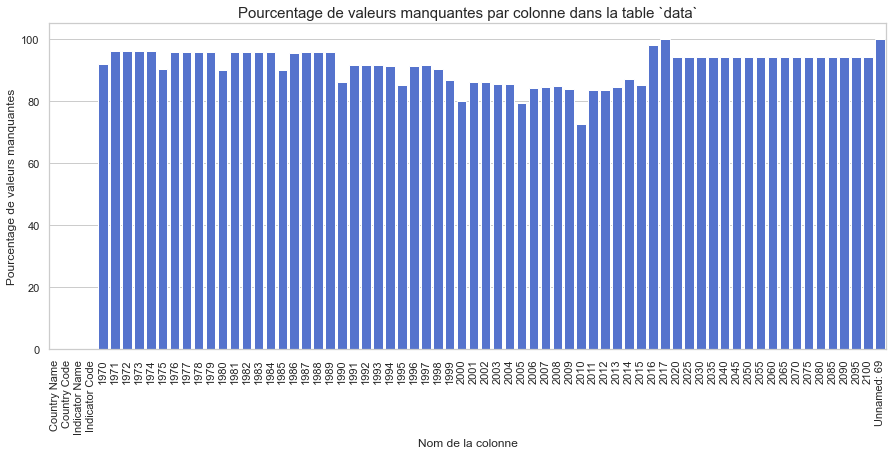

In [358]:
# Visualisation du nombre de valeurs manquantes par colonne pour la table `data`
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 6))

g = sns.barplot(
    x='Nom de la colonne', 
    y='Pourcentage de valeurs manquantes', 
    data=miss_d, 
    color ="royalblue")

g.set_title('Pourcentage de valeurs manquantes par colonne dans la table `data`', fontsize=15)

hide_text = g.set_xticklabels(g.get_xticklabels(), rotation=90)

Quatre colonnes de la table `data` ont toutes leurs valeurs. Ces dernières sont les suivantes: Country Name, Country Code, Indicator Name et Indicator Code.
La colonne "Unnamed:69" n'a aucune donnée. Ne correspondant a aucune variable et n'ayant aucune donnée, elle sera donc par la suite supprimée. 

Les seules colonnes où nous ne trouvons aucunes valeurs manquantes sont les colonnes correspondants à la description des données tels que le nom du pays, les indicateurs et leurs codes respectifs. Sinon, l'année avec le moins de valeurs manquantes est l'année 2010 avec 72.67%. Les années 2016 et 2017 sont au contraire les années avec le plus de données manquantes avec des valeurs avoisinants le 98 - 99 %. Seule une colonne est complètement vide - Unnamed 69. Nous allons donc nous en débarrasser par la suite. 

In [359]:
# Pourcentage de valeurs manquantes dans la table `countryseries`
miss_cs = missing(countryseries)
miss_cs

,Nom de la colonne,Pourcentage de valeurs manquantes
0,CountryCode,0.0
1,SeriesCode,0.0
2,DESCRIPTION,0.0
3,Unnamed: 3,100.0


La table `countrySeries` contient trois colonnes (CountryCode, SeriesCode et DESCRIPTION) qui sont totalement renseignées. Seule la dernière (Unnamed: 3) ne l'est pas. C'est le même scénario que pour la table `data` et elle sera par conséquent aussi supprimée. 

In [360]:
# Pourcentage de valeurs manquantes dans la table `country`
miss_c = missing(country)
miss_c

,Nom de la colonne,Pourcentage de valeurs manquantes
0,Country Code,0.00
1,Short Name,0.00
2,Table Name,0.00
3,Long Name,0.00
4,2-alpha code,1.24
5,Currency Unit,10.79
6,Special Notes,39.83
7,Region,11.20
8,Income Group,11.20
9,WB-2 code,0.41


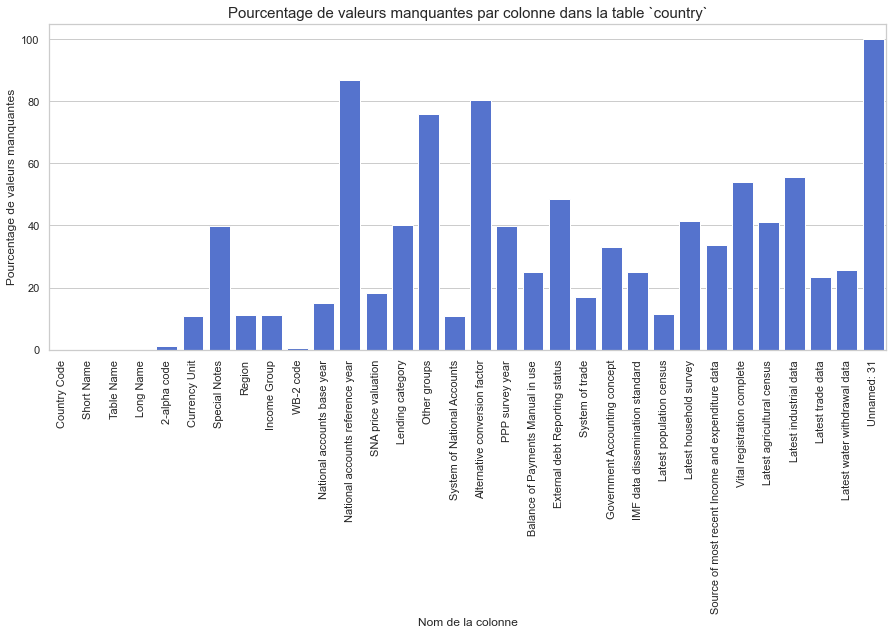

In [361]:
# Visualisation du nombre de valeurs manquantes par colonne pour la table `country`
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 6))

g = sns.barplot(
    x='Nom de la colonne', 
    y='Pourcentage de valeurs manquantes', 
    data=miss_c, 
    color ="royalblue")

g.set_title('Pourcentage de valeurs manquantes par colonne dans la table `country`', fontsize=15)

hide_text = g.set_xticklabels(g.get_xticklabels(), rotation=90)

La table `country` contient quatre colonnes (CountryCode, Short Name, Table Name et Long Name) qui sont totalement renseignées. Seule la dernière (Unnamed: 31) ne l'est pas. C'est le même scénario que pour la table `data` et elle sera par conséquent aussi supprimée. 

In [362]:
# Pourcentage de valeurs manquantes dans la table `series`
miss_s = missing(series)
miss_s 

,Nom de la colonne,Pourcentage de valeurs manquantes
0,Series Code,0.00
1,Topic,0.00
2,Indicator Name,0.00
3,Short definition,41.17
4,Long definition,0.00
5,Unit of measure,100.00
6,Periodicity,97.30
7,Base Period,91.43
8,Other notes,84.94
9,Aggregation method,98.72


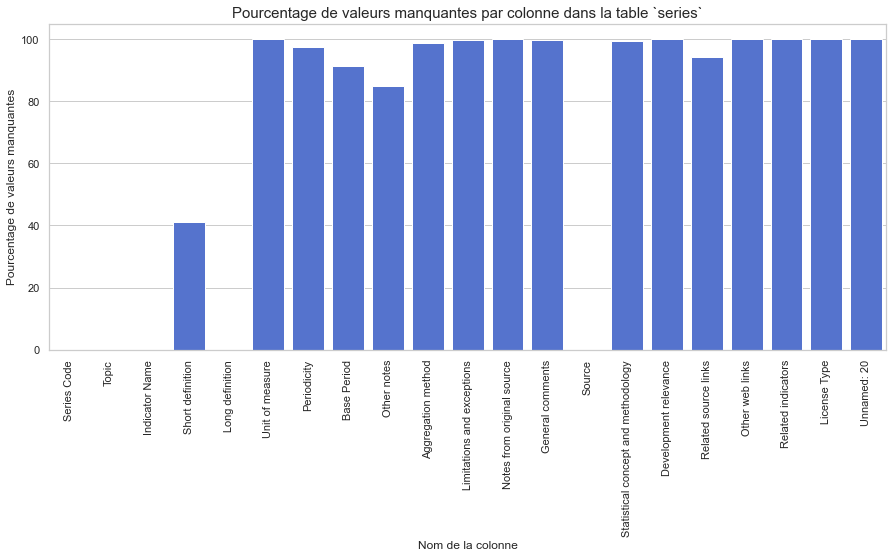

In [363]:
# Visualisation du nombre de valeurs manquantes par colonne pour la table `series`
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 6))

g = sns.barplot(
    x='Nom de la colonne', 
    y='Pourcentage de valeurs manquantes', 
    data=miss_s, 
    color ="royalblue")

g.set_title('Pourcentage de valeurs manquantes par colonne dans la table `series`', fontsize=15)

hide_text = g.set_xticklabels(g.get_xticklabels(), rotation=90)

La table `country` contient cinq colonnes (Series Code, Topic, Indicator Name, Long definition et source) qui sont totalement renseignées. Six colonnes, au contraire, sont totalement vides (Notes from original source, License Type, Unit of measure, Other web links, Related indicators, Unnamed: 20). Elles seront donc supprimées. 

In [364]:
# Pourcentage de valeurs manquantes dans la table `foonote`
miss_f = missing(footnote)
miss_f 

,Nom de la colonne,Pourcentage de valeurs manquantes
0,CountryCode,0.0
1,SeriesCode,0.0
2,Year,0.0
3,DESCRIPTION,0.0
4,Unnamed: 4,100.0


La table `footnote` contient quatre colonnes (CountryCode, SeriesCode, Year et DESCRIPTION) qui sont totalement renseignées. Seule la dernière (Unnamed: 4) ne l'est pas. C'est le même scénario que pour la table `data` et elle sera donc supprimée. 

#### Première suppression des colonnes non nécéssaires dans les bases de données

In [365]:
# Suppression des colonnes inutiles (complètement vides et donc inutilisables)
del data['Unnamed: 69']
del footnote['Unnamed: 4']
del country['Unnamed: 31']
del countryseries['Unnamed: 3']
series = series.drop(['Unnamed: 20', 'Related indicators', 'Other web links', 'Unit of measure', 'License Type', 'Notes from original source'], axis=1)

In [366]:
# Vérification que les colonnes vides ont bien été supprimées
print(country.columns.tolist());
print(countryseries.columns.tolist());
print(series.columns.tolist());
print(footnote.columns.tolist());
print(data.columns.tolist())

['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code', 'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code', 'National accounts base year', 'National accounts reference year', 'SNA price valuation', 'Lending category', 'Other groups', 'System of National Accounts', 'Alternative conversion factor', 'PPP survey year', 'Balance of Payments Manual in use', 'External debt Reporting status', 'System of trade', 'Government Accounting concept', 'IMF data dissemination standard', 'Latest population census', 'Latest household survey', 'Source of most recent Income and expenditure data', 'Vital registration complete', 'Latest agricultural census', 'Latest industrial data', 'Latest trade data', 'Latest water withdrawal data']
['CountryCode', 'SeriesCode', 'DESCRIPTION']
['Series Code', 'Topic', 'Indicator Name', 'Short definition', 'Long definition', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'General comme

Comme constaté lors de la vérification des données manquantes, des colonnes qui portent le même nom dans des tables différentes ont été repérées. 

### Vérification des colonnes communes dans les tables qui composent le jeu de données

Pour vérifier s'il y a des colonnes communes, il est toujours intéressant de s'assurer qu'ils aient le même type d'enchaînement; ainsi, pour simplifier, nous allons retirer les espaces et tout mettre en minuscule.

In [376]:
# Renommage du nom des colonnes de toutes les tables 
renaming_col(data);
renaming_col(country);
renaming_col(countryseries);
renaming_col(series);
renaming_col(footnote);

### Zoom sur la base de données principale - `data`

Dans cette deuxième partie, nous allons passer un peu plus de temps à comprendre notre base de données principale, nommé `data`. Nous allons déjà prendre le temps de regarder le nom de ses colonnes. 

In [378]:
data.info(verbose = False, null_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Columns: 69 entries, countryname to 2100
dtypes: float64(65), object(4)
memory usage: 466.9+ MB


In [379]:
data.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.830000e+00,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.500000e+00,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.813670e+06,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06


La fonction 'Describe' fait ressortir les variables quantitatives dans la table `data`. Ces variables quantitatives sont toutes les colonnes correspondant aux années. Ce sont les colonnes entre 1970 et 2100. Elles correspondent aux années et aux projections.  

In [380]:
data.head(3)

,countryname,countrycode,indicatorname,indicatorcode,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [383]:
data.countryname.nunique()

242

Il y a 242 pays différents selon la base de données `data`. Nous allons voir à quoi, ils correspondent. 

In [387]:
list_c = list(data.countryname.unique())
list_c

['Arab World',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle income',
 'North America',
 'OECD members',
 'South Asia',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)',
 'Upper middle income',
 'World',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Berm

En regardant dans cette liste, nous nous rendons compte que nous n'avons pas que des pays dans cette liste, mais aussi des zones géographiques, des zones monétaires/géographiques voire même des îles appartenants à des pays. 

Pour nettoyer cela, nous allons vérifier si la liste de pays dans la table `country` ne contient lui que des pays.

In [390]:
country.shortname.nunique()

241

In [389]:
list(country.shortname.unique())

['Aruba',
 'Afghanistan',
 'Angola',
 'Albania',
 'Andorra',
 'Arab World',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'American Samoa',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'The Bahamas',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Switzerland',
 'Channel Islands',
 'Chile',
 'China',
 "Côte d'Ivoire",
 'Cameroon',
 'Dem. Rep. Congo',
 'Congo',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Cuba',
 'Curaçao',
 'Cayman Islands',
 'Cyprus',
 'Czech Republic',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'East Asia & Pacific (developing only)',
 'East Asia & Pacific (all income levels)',
 'Europe & Central Asia (developing only)',
 'Europe & Central Asia (all income levels)',
 'Ecua

Ce n'est pas le cas, nous allons alors utiliser une autre méthode. Nous allons créer deux autres listes, l'une contenant les 'regions' et l'autre contenant les 'income group'. Nous allons encore utiliser la table `country` pour créer ces listes. 

#### Noms des colonnes

In [303]:
# Montrer toutes les colonnes des bases de données
country.columns.to_list();
print(countryseries.columns);
print(series.columns);
print(footnote.columns);
print(data.columns)

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION'], dtype='object')
Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Periodicity', 'Base Period', 'Other notes',
       'Aggregation method', 'Limitations and exceptions', 'General comments',
       'Source', 'Statistical concept and methodology',
       'Development relevance', 'Related source links'],
      dtype='object')
Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION'], dtype='object')
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '

Dans la table country, les seules variables qui nous intéressent sont les suivantes: 
Country Code, Short Name, Table Name, Long Name, Region et Income Group. 
La table country nous donne les informations nécessaires pour comprendre les pays et leurs descriptions/indicateurs respectifs.

Dans la table CountrySeries, les seules variables qui nous intéressent sont les suivantes:
Country Code, Series Code (qui fait référence aux indicateurs) et Description
La table countrySeries fait le lien entre la table country et la table Series. 

Dans la tables Series, les seules variables qui nous intéressent sont les suivantes:
Series Code, Indicator Name, Short definition, et à la rigueur Related Indicators.
La table Series nous donne les informations nécessaires par indicateurs. 

Dans la table footNote, nous retrouvons plus ou moins les mêmes informations que dans CountrySeries avec en plus des informations sur les années. Nous n'allons donc pas l'utiliser lors de la partie où nous fusionnons plusieurs tables en une seule table.

Dans la table data, toutes les variables nous intéressent à l'exception de Unnamed: 4. Nous ne pouvons pas utiliser une variable dont nous ne connaissons rien. 

#### Inside look in those DataBases (DBs)

In [6]:
country.tail()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN
240,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,...,General Data Dissemination System (GDDS),2012,"Demographic and Health Survey (DHS), 2010/11","Integrated household survey (IHS), 2011/12",NaN,NaN,NaN,2012.0,2002,NaN


In [7]:
countryseries.tail()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
612,ZWE,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [8]:
series.tail() 

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3664,XGDP.56.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in tertiary institution...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Tertiary,NaN,...,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
footnote.tail()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [10]:
# Notre BD la plus importante
data.tail() 

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886929,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Common variables between DBs

In [76]:
... print(np.intersect1d(data.columns, country.columns))
... print(np.intersect1d(data.columns, series.columns))
... print(np.intersect1d(data.columns, footnote.columns))
... print(np.intersect1d(data.columns, countryseries.columns))
... print(np.intersect1d(country.columns, countryseries.columns))
# Une variable en commun entre data et country : Country Code
# Une variable en commun entre data et series : Indicator Name
# Aucun nom en commun 
# (mais en réalité, il y a bien des variables en commun mais elles ne portent pas forcément exactement le même nom)

['Country Code']
['Indicator Name']
[]
[]
[]


Une variable en commun entre data et country : Country Code et une variable en commun entre data et series : Indicator Name. Par contre, pour les autres tables, il n'y a aucun nom en commun, du moins en apparence. En réalité, il y a bien des variables en commun mais elles ne portent pas forcément exactement le même nom.

### Missing data

#### Suppression des colonnes non nécéssaires dans les bases de données

In [ ]:
del data['Unnamed: 69']
del footnote['Unnamed: 4']
del country['Unnamed: 31']
del countryseries['Unnamed: 3']
del series['Unnamed: 20']

print(country.columns);
print(countryseries.columns);
print(series.columns);
print(footnote.columns);
print(data.columns)

#### Création de listes - zones, pays, niveau de vie

In [ ]:
region_list = set(country['Region'].dropna().tolist());
gdp_list = set(country['Income Group'].dropna().tolist());
country_list = set(country['Short Name'].dropna().tolist());

In [ ]:
region_list

In [ ]:
gdp_list

In [ ]:
country_list

#### Create a clean list with only the countries

In [ ]:
list_tot = [*region_list, *gdp_list];
country_list = [x for x in list_country if x not in list_tot];

In [ ]:
list_rest = ['Middle East & North Africa (all income levels)', 
             'East Asia & Pacific (developing only)', 
             'Latin America & Caribbean (all income levels)', 
             'Heavily indebted poor countries (HIPC)', 
             'Sub-Saharan Africa (developing only)', 
             'Least developed countries: UN classification', 
             'Low & middle income', 
             'East Asia & Pacific (all income levels)', 
             'Europe & Central Asia (all income levels)', 
             'Europe & Central Asia (developing only)', 
             'Middle East & North Africa (developing only)', 
             'World', 
             'Sub-Saharan Africa (all income levels)', 
             'European Union', 
             'Upper middle income', 
             'High income', 
             'Euro area', 
             'Latin America & Caribbean (developing only)', 
             'Middle East & North Africa (excluding high income)', 
             'Europe & Central Asia (excluding high income)', 
             'East Asia & Pacific (excluding high income)', 
             'Latin America & Caribbean (excluding high income)', 
             'Lower middle income', 
             'OECD members', 
             'Sub-Saharan Africa (excluding high income)', 
             'Middle income', 
             'Arab World', 
             'East Asia & Pacific', 
             'Europe & Central Asia', 
             'Latin America & Caribbean', 
             'Low income', 
             'Middle East & North Africa', 
             'North America', 'South Asia', 
             'Sub-Saharan Africa', 
             #'British Virgin Islands', 
             #'Curacao', 
             #'Nauru', 
             #'Sint Maarten (Dutch part)', 
             #'St. Martin (French part)'
            ]

In [ ]:
list_tot = [*list_tot, *list_rest];
country_list = [x for x in country_list if x not in list_tot];
country_list

In [ ]:
print(len(country_list));
print(len(region_list));
print(len(gdp_list));

#### Suppression de lignes non liées au pays

In [ ]:
data = data[~data['Country Name'].isin(list_tot)]

In [ ]:
data.shape

In [ ]:
data.sample(50)

### Informations supplémentaires sur data

In [ ]:
print(data['Indicator Name'].nunique());
print(data['Indicator Code'].nunique());
print(data['Country Name'].nunique());

In [ ]:
countryseries['CountryCode'].nunique()

### Valeurs manquantes dans les dataframes autre que `data`

In [78]:
print('footnote table : \n\n' ,footnote.isna().sum().sort_values(ascending=False), '\n');
print('series table : \n\n' ,series.isna().sum().sort_values(ascending=False), '\n');
print('countryseries table : \n\n' ,countryseries.isna().sum().sort_values(ascending=False), '\n');
print('country table : \n\n' ,country.isna().sum().sort_values(ascending=False))

footnote table : 

 Unnamed: 4     643638
DESCRIPTION         0
Year                0
SeriesCode          0
CountryCode         0
dtype: int64 

series table : 

 Unnamed: 20                            3665
Related indicators                     3665
Other web links                        3665
Unit of measure                        3665
License Type                           3665
Notes from original source             3665
Development relevance                  3662
General comments                       3651
Limitations and exceptions             3651
Statistical concept and methodology    3642
Aggregation method                     3618
Periodicity                            3566
Related source links                   3450
Base Period                            3351
Other notes                            3113
Short definition                       1509
Source                                    0
Long definition                           0
Indicator Name                            0
T

### Fusion de dataframes 

In [ ]:
data = data.merge(right = country[['Country Code', 'Region', 'Income Group']], 
                  on='Country Code', how='left')

In [ ]:
data.columns

In [ ]:
data.sample(5)

### Informations sur les indicateurs 

### Selection des informations les plus pertinentes pour répondre à la question (quelles colonnes)

### Déterminer des ordres de grandeurs des indicateurs statistiques classique pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

### Les questions que nous nous posons ? 

#### 1. Première question : Quels sont les pays avec le plus forts potentiel de client à nos services ? 

#### 2. Deuxième question : Pour chacun de ses pays, quelle sera l'évolution de ce potentiel de clients ? 

#### 3. Troisième question : Dans quels pays l'entreprise doit-elle opérer en priorité ? 

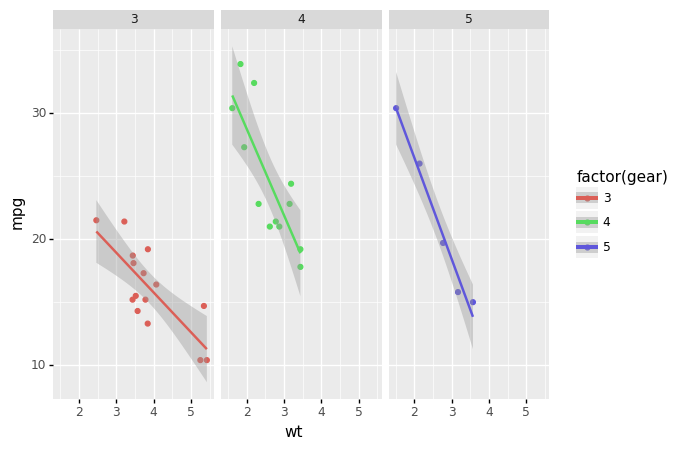

<ggplot: (139053638018)>